# EXPLORATORY DATA ANALYSIS

In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
from helpers import data_preparation
from scipy import stats

In [4]:
df = pd.read_csv('datasets/database-1716945632.246805.csv')

In [5]:
df.head()

,Unnamed: 0,URL,Fabricante,Modelo,Versao,Valor,Cidade,Ano,Combustível,Placa final,...,Faróis com projetor,Ancoragem de cadeiras infantis,Apoio de braço no banco traseiro,Monitoramento de pressão dos pneus,Park assist,Faróis de led matrix,Apple carplay sem fio,Calha de chuva,Alças de segurança no teto,Freio a disco dianteiro
0,0,https://www.mobiauto.com.br/comprar/carros/ba-...,Fiat,Siena,EL 1.0 8V (Flex),R$ 34.900,Salvador - BA,2012/2013,Flex,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,https://www.mobiauto.com.br/comprar/carros/ba-...,Volkswagen,Fox,1.6 MSI Connect (Flex),R$ 62.900,Salvador - BA,2021/2022,Flex,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,https://www.mobiauto.com.br/comprar/carros/ba-...,Ford,Ka Sedan,Titanium 1.5 (Aut) (Flex),R$ 63.900,Lauro de Freitas - BA,2018/2019,Flex,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,https://www.mobiauto.com.br/comprar/carros/ba-...,Volkswagen,Gol,1.0 MPI Trendline (Flex) 2p,R$ 42.900,Salvador - BA,2016/2017,Flex,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,https://www.mobiauto.com.br/comprar/carros/ba-...,Toyota,Yaris,1.5 XS Connect CVT (Flex),R$ 89.900,Salvador - BA,2021/2022,Flex,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#df2 = data_preparation(df)

In [13]:
#df2.to_csv('./datasets/database_cleaned-1716945632.246805.csv')

In [4]:
df2 = pd.read_csv('datasets/database_cleaned-1716945632.246805.csv')

In [5]:
df2.head()

,Fabricante,Modelo,Versao,Valor,Cidade,Combustível,KM,Câmbio,Cor,Carroceria,...,Sensor crepuscular,Banco do passageiro com ajuste elétrico,Veículo alienado,Bancos dianteiros com aquecimento,Pneus de uso off-road,Park assist paralelo,Calha de chuva,Freio a disco dianteiro,Ar quente (ar-condicionado),Model year
0,Toyota,Hilux SW4,SRV 4x4 3.0 Turbo (aut)2,79900,Lauro de Freitas - BA,Diesel,270000,Automática,Prata,SUV,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,2009
1,Volkswagen,T-Cross,1.0 200 TSI Comfortline (Aut) (Flex),110900,Salvador - BA,Flex,30016,Automática,Prata,SUV,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,2022
2,Volkswagen,T-Cross,1.0 200 TSI Comfortline (Aut) (Flex),107000,Salvador - BA,Flex,3617,Automática,Branco,SUV,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,2022
3,Volkswagen,Taos,Highline 1.4 TSI (Aut) (Flex),164900,Salvador - BA,Flex,23608,Automática,Azul,Não,...,Sim,Não,Não,Não,Não,Não,Não,Não,Não,2022
4,Volkswagen,T-Cross,1.0 200 TSI Comfortline (Aut) (Flex),112900,Salvador - BA,Flex,7972,Automática,Branco,SUV,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,2022


In [18]:
df2.isnull().sum().sum()

0

In [19]:
num_variables = df2.select_dtypes(['int64']).columns.tolist()
num_variables

['Valor', 'KM', 'Model year']

In [20]:
cat_variables = df2.select_dtypes('object').columns.tolist()
cat_variables

['Fabricante',
 'Modelo',
 'Versao',
 'Cidade',
 'Combustível',
 'Câmbio',
 'Cor',
 'Carroceria',
 'Desembaçador do vidro traseiro',
 'Computador de bordo',
 'Aceita troca',
 'Pronta entrega',
 'Motorização',
 'Potência (cv)',
 'Torque (kgf.m)',
 'Velocidade máxima (km/h)',
 'Tempo 0-100 (s)',
 'Consumo cidade (km/l)',
 'Consumo estrada (km/l)',
 'Tração',
 'Direção',
 'Suspensão dianteira',
 'Suspensão traseira',
 'Freios dianteiros',
 'Freios traseiros',
 'Altura (mm)',
 'Largura (mm)',
 'Comprimento (mm)',
 'Peso (kg)',
 'Tanque (L)',
 'Entre-eixos (mm)',
 'Porta-Malas (L)',
 'Ocupantes',
 'Desembaçador traseiro',
 'Airbag para motorista',
 'Direção elétrica',
 'Volante multifuncional',
 'Airbag central',
 'Ar condicionado digital',
 'Veículo de não fumante',
 'Revisões realizadas',
 'Laudo cautelar aprovado',
 'Possui vistoria',
 'Ar condicionado',
 'Controle elétrico do vidros dianteiros',
 'Travas elétricas',
 'Retrovisores elétricos',
 'Alarme',
 'Freios abs',
 'Bancos revestido

In [16]:
corr = df2[num_variables].corr()
corr

,Valor,KM,Model year
Valor,1.000000,-0.148315,0.190621
KM,-0.148315,1.000000,-0.496407
Model year,0.190621,-0.496407,1.000000


<Axes: >

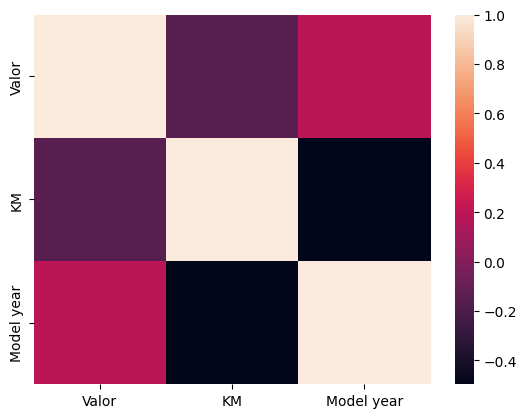

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(corr)

In [44]:
df_usados = df2[df2['KM']>0]

In [45]:
fabricantes = df_usados['Fabricante'].value_counts()

In [46]:
fabricantes.index

Index(['Fiat', 'Volkswagen', 'Chevrolet', 'Hyundai', 'Renault', 'Ford', 'Jeep',
       'Toyota', 'Honda', 'Peugeot', 'Citroën', 'Mitsubishi', 'Nissan',
       'CAOA Chery', 'Mercedes-Benz', 'BMW', 'Kia', 'Land Rover', 'Audi',
       'Suzuki', 'Troller', 'Volvo', 'Porsche', 'Lifan', 'Jaguar', 'JAC',
       'Dodge', 'Smart', 'MINI', 'Ferrari', 'RAM', 'Chrysler'],
      dtype='object', name='Fabricante')

/tmp/ipykernel_1380/162454550.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(fabricantes.index, rotation=90)


<Axes: title={'center': 'Mercado de Usados - Fabricantes'}, xlabel='Fabricante', ylabel='Contagem'>

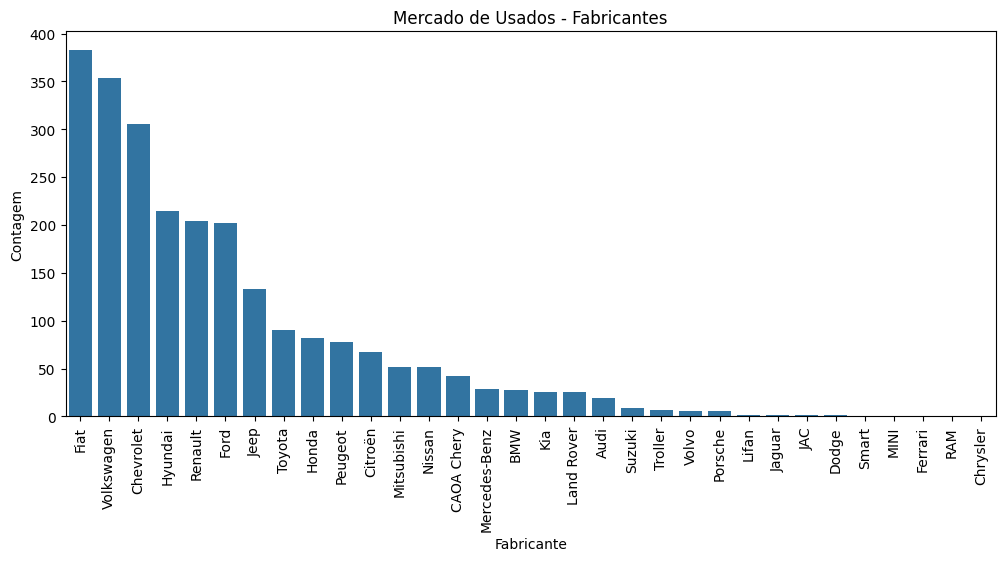

In [43]:
fig, ax = plt.subplots(figsize=(12,5))  
ax.set_xticklabels(fabricantes.index, rotation=90)
ax.set_title('Mercado de Usados - Fabricantes')
ax.set_ylabel('Contagem')
sns.barplot(fabricantes)

In [49]:
modelos = df_usados['Modelo'].value_counts()

In [50]:
len(modelos)

235

/tmp/ipykernel_1380/1038103854.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(modelos[0:30].index, rotation=90)


<Axes: title={'center': 'Mercado de Usados - Modelos'}, xlabel='Modelo', ylabel='Contagem'>

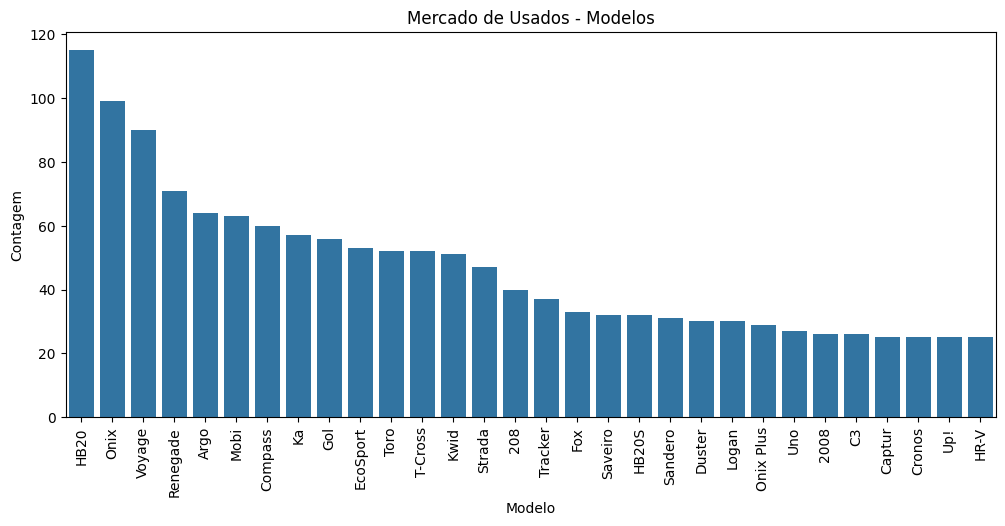

In [52]:
fig, ax = plt.subplots(figsize=(12,5))  
ax.set_xticklabels(modelos[0:30].index, rotation=90)
ax.set_title('Mercado de Usados - Modelos')
ax.set_ylabel('Contagem')
sns.barplot(modelos[0:30])

/tmp/ipykernel_1380/3205134150.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cores.index, rotation=90)


<Axes: title={'center': 'Mercado de Usados - Cor'}, xlabel='Cor', ylabel='Contagem'>

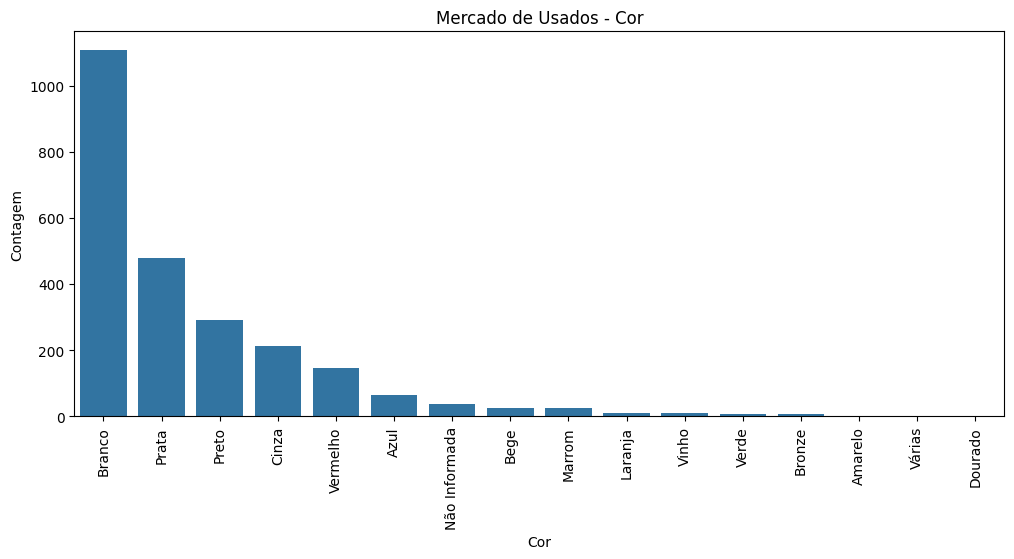

In [55]:
cores = df_usados['Cor'].value_counts()
fig, ax = plt.subplots(figsize=(12,5))  
ax.set_xticklabels(cores.index, rotation=90)
ax.set_title('Mercado de Usados - Cor')
ax.set_ylabel('Contagem')
sns.barplot(cores)

In [58]:
df_usados['Câmera de ré'].value_counts()

Câmera de ré
Não    2096
Sim     333
Name: count, dtype: int64

In [59]:
df_usados[df_usados['Câmera de ré'] == 'Sim']

,Fabricante,Modelo,Versao,Valor,Cidade,Combustível,KM,Câmbio,Cor,Carroceria,...,Ancoragem de cadeiras infantis,Apoio de braço no banco traseiro,Monitoramento de pressão dos pneus,Park assist,Faróis de led matrix,Apple carplay sem fio,Calha de chuva,Alças de segurança no teto,Freio a disco dianteiro,Model year
10,Fiat,Toro,Endurance 1.8 AT6 FLEX (Aut),88900,Salvador - BA,Flex,89000,Automática,Azul,Picapes,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,2020
12,Honda,HR-V,EX CVT 1.8 I-VTEC FlexOne,114900,Salvador - BA,Flex,31481,Automática,Prata,SUV,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,2021
14,Mitsubishi,ASX,2.0 CVT AWD,74900,Lauro de Freitas - BA,Gasolina,150000,Automática,Prata,SUV,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,2016
19,Renault,Kwid,Intense 1.0 12v SCe (Flex),59900,Salvador - BA,Flex,57,Manual,Prata,Hatch,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,2023
33,Chevrolet,S10 Cabine Dupla,LTZ 2.5,175990,Salvador - BA,Flex,60,Automática,Branco,Picapes,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2509,Chevrolet,Onix,Premier 1.0 Turbo (Aut.),99900,Lauro de Freitas - BA,Flex,13051,Automática,Branco,Hatch,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,2023
2511,Volkswagen,Jetta,1.4 250 TSI Comfortline,199900,Lauro de Freitas - BA,Gasolina,51682,Automática,Preto,Sedan,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,2020
2516,Citroën,C4 Cactus,1.6 Feel Pack (Aut) (Flex),89990,Salvador - BA,Flex,53500,Manual,Cinza,SUV,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,2022
2517,Citroën,C4 Cactus,1.6 Feel Pack (Aut) (Flex),89990,Salvador - BA,Flex,29930,Automática,Branco,SUV,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,2022


In [60]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

X = df_usados.drop('Valor', axis=1)
y = df_usados['Valor']

In [97]:
max(y)

4700000

In [61]:
num_variables = X.select_dtypes(['int64']).columns.tolist()
cat_variables = X.select_dtypes('object').columns.tolist()

X[cat_variables] = X[cat_variables].astype(str)

ct = ColumnTransformer([('num', StandardScaler(), num_variables),
                        ('cat', OneHotEncoder(drop='first'), cat_variables)])

X_trans = ct.fit_transform(X)

In [63]:
X_trans.shape

(2429, 5356)

In [64]:
X_trans.toarray().shape

(2429, 5356)

In [65]:
num_columns = ct.named_transformers_['num'].get_feature_names_out().tolist()
cat_columns = ct.named_transformers_['cat'].get_feature_names_out().tolist()

In [66]:
num_columns+cat_columns

['KM',
 'Model year',
 'Fabricante_BMW',
 'Fabricante_CAOA Chery',
 'Fabricante_Chevrolet',
 'Fabricante_Chrysler',
 'Fabricante_Citroën',
 'Fabricante_Dodge',
 'Fabricante_Ferrari',
 'Fabricante_Fiat',
 'Fabricante_Ford',
 'Fabricante_Honda',
 'Fabricante_Hyundai',
 'Fabricante_JAC',
 'Fabricante_Jaguar',
 'Fabricante_Jeep',
 'Fabricante_Kia',
 'Fabricante_Land Rover',
 'Fabricante_Lifan',
 'Fabricante_MINI',
 'Fabricante_Mercedes-Benz',
 'Fabricante_Mitsubishi',
 'Fabricante_Nissan',
 'Fabricante_Peugeot',
 'Fabricante_Porsche',
 'Fabricante_RAM',
 'Fabricante_Renault',
 'Fabricante_Smart',
 'Fabricante_Suzuki',
 'Fabricante_Toyota',
 'Fabricante_Troller',
 'Fabricante_Volkswagen',
 'Fabricante_Volvo',
 'Modelo_207',
 'Modelo_208',
 'Modelo_218i',
 'Modelo_3008',
 'Modelo_300C',
 'Modelo_308',
 'Modelo_320i',
 'Modelo_328i',
 'Modelo_408',
 'Modelo_430i Cabriolet',
 'Modelo_500',
 'Modelo_5008',
 'Modelo_718 Boxster',
 'Modelo_911',
 'Modelo_A 200',
 'Modelo_A 250',
 'Modelo_A3',
 'M

In [67]:
X_trans = pd.DataFrame(X_trans.toarray(), columns=(num_columns+cat_columns))
X_trans

,KM,Model year,Fabricante_BMW,Fabricante_CAOA Chery,Fabricante_Chevrolet,Fabricante_Chrysler,Fabricante_Citroën,Fabricante_Dodge,Fabricante_Ferrari,Fabricante_Fiat,...,Faróis com projetor_Sim,Ancoragem de cadeiras infantis_Sim,Apoio de braço no banco traseiro_Sim,Monitoramento de pressão dos pneus_Sim,Park assist_Sim,Faróis de led matrix_Sim,Apple carplay sem fio_Sim,Calha de chuva_Sim,Alças de segurança no teto_Sim,Freio a disco dianteiro_Sim
0,-1.557854,-1.501177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.247860,0.877573,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.971752,0.084656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.528957,-0.443955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.116198,0.877573,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2424,3.878595,-2.558400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2425,-1.559906,-1.236872,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2426,-0.431190,-0.972566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2427,-1.065520,-0.708261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: xlabel='KM', ylabel='Count'>

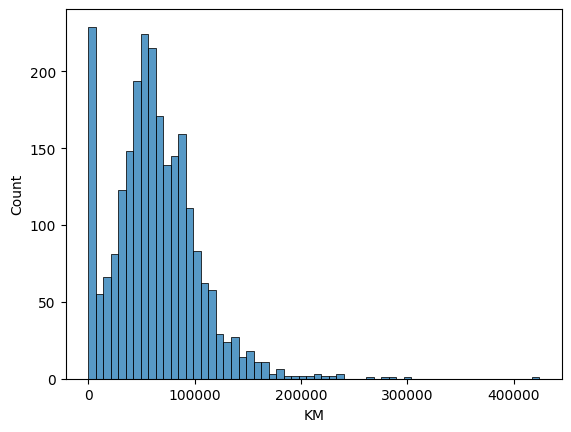

In [95]:
sns.histplot(X, x='KM')

<Axes: xlabel='Valor', ylabel='Count'>

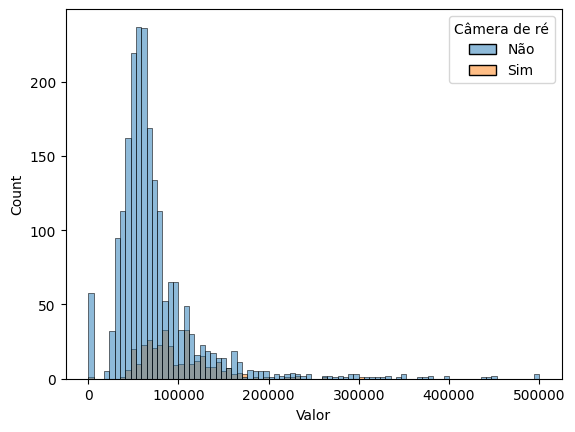

In [102]:
sns.histplot(data=df_usados[df_usados['Valor'] < 500000], x='Valor', hue='Câmera de ré')

A descrição dos anúncios não é a melhor fonte de informação sobre features nos mesmos. Um banco de dados com a ficha técnica precisa, tal qual o fabricante deve possuir, adicionaria muito valor a esses anúncios.

In [106]:
df_usados[df_usados['Valor'] > 500000].head()

,Fabricante,Modelo,Versao,Valor,Cidade,Combustível,KM,Câmbio,Cor,Carroceria,...,Ancoragem de cadeiras infantis,Apoio de braço no banco traseiro,Monitoramento de pressão dos pneus,Park assist,Faróis de led matrix,Apple carplay sem fio,Calha de chuva,Alças de segurança no teto,Freio a disco dianteiro,Model year
190,Porsche,911,Turbo S Coupe 3.6/3.8 24V (991/992),2100000,Salvador - BA,Gasolina,700,Automática,Amarelo,Sedan,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,2023
403,Ferrari,F8 Tributo,3.9 V8 Bi-Turbo 720cv,4700000,Salvador - BA,Gasolina,2700,Automática,Vermelho,Coupé,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,2022
405,Mercedes-Benz,CLA 45 AMG,S 2.0 Turbo 4MATIC BRH,589000,Salvador - BA,Gasolina,100,Automática,Vermelho,Sedan,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,2023
406,Ford,Mustang,Mach 1 V8 5.0 (Aut),519990,Salvador - BA,Gasolina,975,Automática,Cinza,Sedan,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,2022
573,Porsche,718 Boxster,Boxster 2.0,559900,Salvador - BA,Gasolina,16000,Automática,Branco,Conversível,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,2019


In [71]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(.8*(1-.8)))

X_sel = sel.fit_transform(X_trans.iloc[:,2:])
X_sel

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])

In [72]:
X_sel.shape

(2429, 72)

In [73]:
X_trans.iloc[:,:2].columns.tolist()+['a']

['KM', 'Model year', 'a']

In [74]:
X_sel2 = np.concatenate((X_trans.iloc[:,:2].values, X_sel), axis=1)

In [75]:
X_sel2

array([[-1.55785443, -1.50117744,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.2478597 ,  0.87757292,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.9717522 ,  0.08465614,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.43118967, -0.97256625,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.06551953, -0.70826065,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.00253496, -1.23687184,  1.        , ...,  0.        ,
         0.        ,  0.        ]])

In [76]:
sel2_columns = X_trans.iloc[:,:2].columns.tolist()+sel.get_feature_names_out().tolist()

In [77]:
sel2_columns

['KM',
 'Model year',
 'Câmbio_Automática',
 'Câmbio_Manual',
 'Cor_Branco',
 'Carroceria_Hatch',
 'Carroceria_SUV',
 'Desembaçador do vidro traseiro_Sim',
 'Aceita troca_Sim',
 'Pronta entrega_Sim',
 'Motorização_1.0',
 'Velocidade máxima (km/h)_N/C',
 'Tração_Dianteira',
 'Tração_dianteira',
 'Direção_Elétrica',
 'Direção_Não',
 'Suspensão dianteira_Suspensão tipo McPherson e dianteira com barra estabilizadora, roda tipo independente e molas helicoidal.',
 'Suspensão traseira_Suspensão tipo eixo de torção, roda tipo semi-independente e molas helicoidal.',
 'Freios dianteiros_Dois freios à disco com dois discos ventilados.',
 'Freios traseiros_Não',
 'Desembaçador traseiro_Sim',
 'Airbag para motorista_Sim',
 'Direção elétrica_Sim',
 'Volante multifuncional_Sim',
 'Veículo de não fumante_Sim',
 'Revisões realizadas_Sim',
 'Laudo cautelar aprovado_Sim',
 'Controle elétrico do vidros dianteiros_Sim',
 'Retrovisores elétricos_Sim',
 'Alarme_Sim',
 'Bancos revestidos de couro_Sim',
 'Airb

In [78]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(max_depth=5)
rf_model.fit(X_sel2, y)

RandomForestRegressor(max_depth=5)

In [79]:
y_pred = rf_model.predict(X_sel2)

In [80]:
rf_model.score(X_sel2, y)

0.7665754202008668

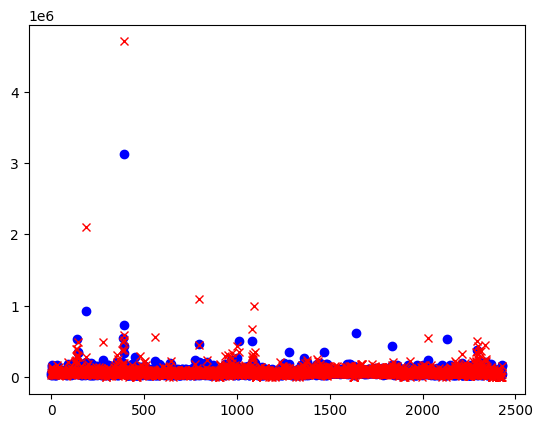

In [81]:
import matplotlib.pyplot as plt

plt.plot(range(len(y_pred)), y_pred, 'bo')
plt.plot(range(len(y_pred)), y, 'rx')

In [82]:
sorted(zip(rf_model.feature_importances_,sel2_columns),reverse=True)

[(0.22171337197945984, 'KM'),
 (0.10023793511889968, 'Câmbio_Automática'),
 (0.09192954657985439, 'Cd player com mp3_Sim'),
 (0.08224145455223271, 'Controle elétrico do vidros dianteiros_Sim'),
 (0.055956699141704494, 'Bancos revestidos de couro_Sim'),
 (0.05333136438880333, 'Model year'),
 (0.05001303871781072, 'Tração_dianteira'),
 (0.028375004875995476, 'Freios traseiros_Não'),
 (0.02426767975635205, 'Câmbio_Manual'),
 (0.023565593640783714, 'Banco do motorista com regulagem de altura_Sim'),
 (0.02129434917972371, 'Ajuste elétrico dos retrovisores_Sim'),
 (0.019518236804737587, 'Volante com ajuste de altura_Sim'),
 (0.01782955740024582, 'Farol de neblina_Sim'),
 (0.017459732118666787, 'Desembaçador do vidro traseiro_Sim'),
 (0.016582209054120323, 'Encosto de cabeça para todos os ocupantes_Sim'),
 (0.015573158915699027, 'Bluetooth_Sim'),
 (0.0145754038958215, 'Cd player_Sim'),
 (0.01324773253028847, 'Airbag para motorista_Sim'),
 (0.011564741207420383, 'Velocidade máxima (km/h)_N/C')

In [83]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_sel2, y)

LinearRegression()

In [84]:
lr.score(X_sel2, y)

0.23985514142117814

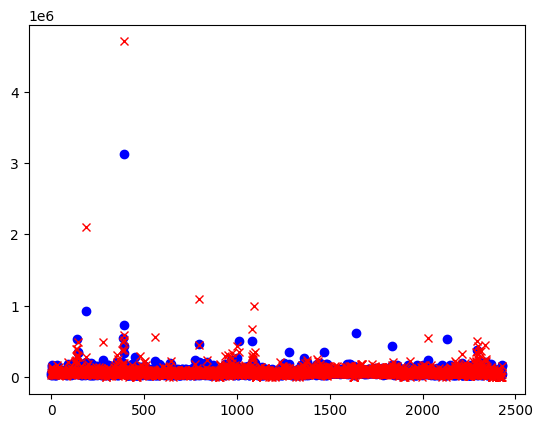

In [85]:
y_pred2 = lr.predict(X_sel2)
plt.plot(range(len(y_pred)), y_pred, 'bo')
plt.plot(range(len(y_pred)), y, 'rx')

In [86]:
sorted(zip(lr.coef_,sel2_columns),reverse=True)

[(69017.72394509122, 'Direção_Não'),
 (36066.24443303404, 'Encosto de cabeça para todos os ocupantes_Sim'),
 (28085.548653114776, 'Vidros elétricos dianteiros_Sim'),
 (20628.4258004283, 'Banco do motorista com regulagem de altura_Sim'),
 (20002.535320340714, 'Entradas usb_Sim'),
 (19729.52892523426, 'Cd player_Sim'),
 (19195.85163987081, 'Controle de tração_Sim'),
 (19054.144835132094, 'Sensor de estacionamento dianteiro_Sim'),
 (18862.81770335989, 'Bancos revestidos de couro_Sim'),
 (16700.349739352376, 'Model year'),
 (16434.76106508466, 'Retrovisores elétricos_Sim'),
 (15353.831790426395, 'Volante com ajuste de altura_Sim'),
 (13784.404971813185, 'Desembaçador do vidro traseiro_Sim'),
 (12612.006878726099, 'Alarme_Sim'),
 (11526.222317692955, 'Airbags frontais_Sim'),
 (10857.464612034419, 'Central multimídia_Sim'),
 (9884.32242362586, 'Limpador do vidro traseiro_Sim'),
 (9108.159952702734, 'Controle elétrico do vidros traseiros_Sim'),
 (9039.889314620254,
  'Freios dianteiros_Dois f

In [87]:
df2.groupby('Câmbio')['Valor'].mean()

Câmbio
Automatizado             103153.294118
Automática               121384.949206
Automática Sequencial     76010.625000
CVT                       86106.578947
Manual                    52421.302508
Name: Valor, dtype: float64

/home/estacio/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 0, 'KM')

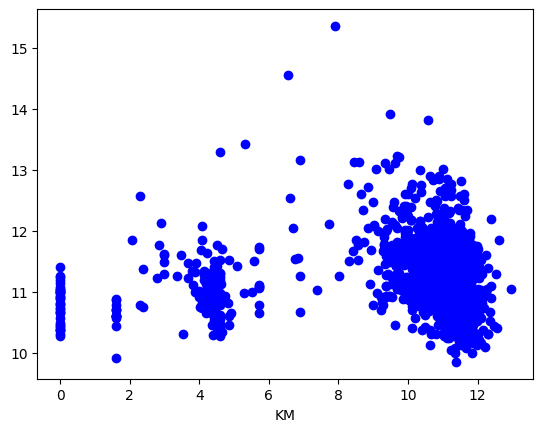

In [88]:
fig, ax = plt.subplots()
ax.plot(np.log(df2['KM']), np.log(df2['Valor']), 'bo')
ax.set_xlabel('KM')

In [89]:
range(len(df))

range(0, 2665)